In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import sparse
from scipy.sparse import linalg

## No BC

Au + f = 0

In [3]:
Nx = 100
Ny = 100
dx = 0.01
dy = 0.01

In [4]:
A = sparse.eye(Nx*Ny) * (-2/dx**2 + -2/dy**2)
A += sparse.eye(Nx*Ny, k=1) / dx**2
A += sparse.eye(Nx*Ny, k=-1) / dx**2
A += sparse.eye(Nx*Ny, k=Nx) / dy**2
A += sparse.eye(Nx*Ny, k=-Nx) / dy**2

A = A.toarray()
for i in range(1, Ny):
    A[Nx*i-1, Nx*i] = 0
    A[Nx*i, Nx*i-1] = 0
    
A = sparse.csc_matrix(A)

In [11]:
f = np.ones((Nx*Ny, 1))

In [12]:
u = linalg.spsolve(A, -f)

(0.0, 1.0, 0.0, 1.0)

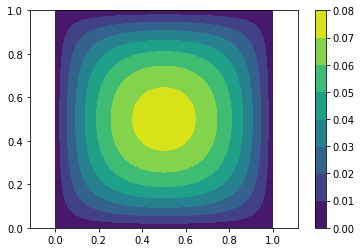

In [13]:
ua = np.reshape(u, (Ny, Nx))

X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny))
plt.contourf(X, Y, ua)
plt.colorbar()
plt.axis('equal')

## With Dirichlet BC

Au + bc + f = 0

In [168]:
Nx = 100
Ny = 100
dx = 0.01
dy = 0.01

# boundary condition
u_b = 0   # bottom
u_t = 0   # top
u_l = 1   # left
u_r = 0   # right

In [169]:
size = (Nx-2) * (Ny-2)
A = sparse.eye(size) * (-2/dx**2 + -2/dy**2)
A += sparse.eye(size, k=1) / dx**2
A += sparse.eye(size, k=-1) / dx**2
A += sparse.eye(size, k=Nx-2) / dy**2
A += sparse.eye(size, k=-Nx+2) / dy**2

A = A.toarray()
for i in range(1, Ny-2):
    A[(Nx-2)*i-1, (Nx-2)*i] = 0
    A[(Nx-2)*i, (Nx-2)*i-1] = 0
    
A = sparse.csc_matrix(A)

bc1 = np.zeros((size, 1))
bc1[:(Nx-2)] = u_b
bc1[-(Nx-2):] = u_t
bc2 = np.zeros((Ny-2, Nx-2))
bc2[:,0] = u_l
bc2[:,-1] = u_r
bc2 = np.reshape(bc2, (size, 1))
bc = bc1 / dy**2 + bc2 / dx**2

In [170]:
f = np.ones((size, 1))

In [171]:
u = linalg.spsolve(A, -f-bc)

(0.0, 1.0, 0.0, 1.0)

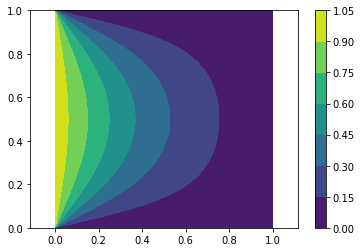

In [172]:
ua = np.reshape(u, (Ny-2, Nx-2))
bc_b = np.zeros((1, Nx)) + u_b
bc_t = np.zeros((1, Nx)) + u_t
bc_l = np.zeros((Ny-2, 1)) + u_l
bc_r = np.zeros((Ny-2, 1)) + u_r
ua = np.block([[bc_b], [bc_l, ua, bc_r], [bc_t]])

X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny))
plt.contourf(X, Y, ua)
plt.colorbar()
plt.axis('equal')

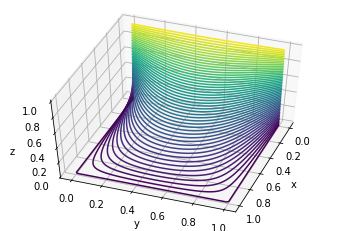

In [173]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, ua, 50)
ax.view_init(50, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');